In [ ]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('statsr')

In [ ]:
library(dplyr)
library(ggplot2)

In [4]:
dataset <- read.csv("Financial_Inclusion_Train.csv", stringsAsFactors = TRUE)

In [5]:
summary(dataset)

     country          year               uniqueid     bank_account
 Kenya   :6068   Min.   :2016   uniqueid_1   :    4   No :20212   
 Rwanda  :8735   1st Qu.:2016   uniqueid_10  :    4   Yes: 3312   
 Tanzania:6620   Median :2017   uniqueid_100 :    4               
 Uganda  :2101   Mean   :2017   uniqueid_1000:    4               
                 3rd Qu.:2018   uniqueid_1001:    4               
                 Max.   :2018   uniqueid_1002:    4               
                                (Other)      :23500               
 location_type cellphone_access household_size   age_of_respondent
 Rural:14343   No : 6070        Min.   : 1.000   Min.   : 16.00   
 Urban: 9181   Yes:17454        1st Qu.: 2.000   1st Qu.: 26.00   
                                Median : 3.000   Median : 35.00   
                                Mean   : 3.797   Mean   : 38.81   
                                3rd Qu.: 5.000   3rd Qu.: 49.00   
                                Max.   :21.000   Max.   :100.0

In [6]:
colSums(is.na(dataset))

country                   year               uniqueid 
                     0                      0                      0 
          bank_account          location_type       cellphone_access 
                     0                      0                      0 
        household_size      age_of_respondent   gender_of_respondent 
                     0                      0                      0 
relationship_with_head         marital_status        education_level 
                     0                      0                      0 
              job_type 
                     0

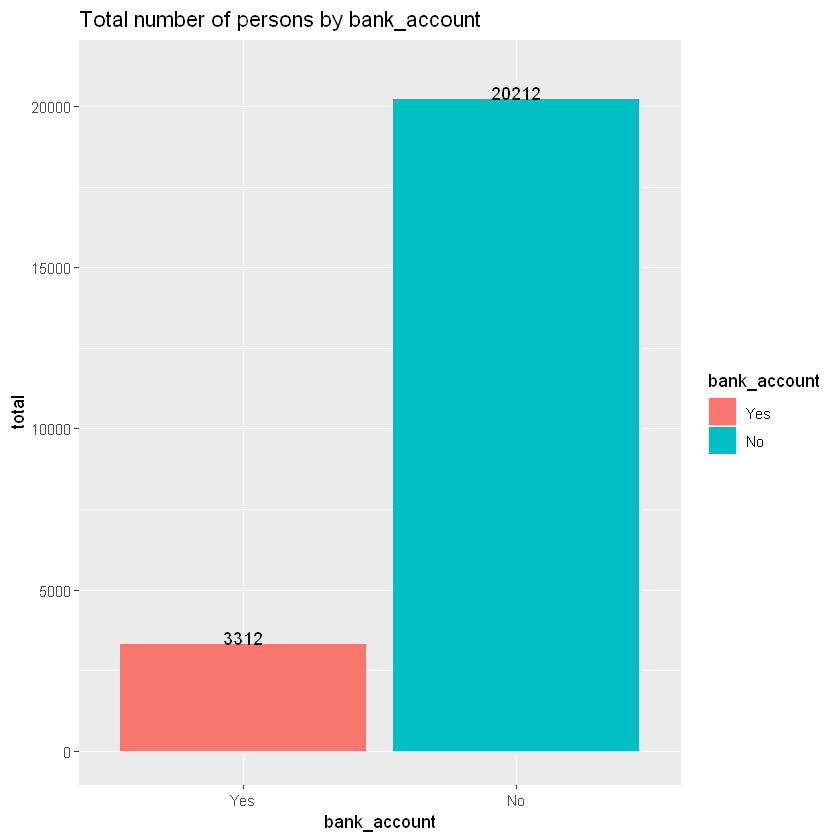

In [7]:
dataset %>%
  group_by(bank_account) %>%
  summarise(total=n(), .groups = "drop_last") %>%
  mutate(bank_account=reorder(bank_account,total)) %>%
  ggplot(aes(bank_account,total, fill=bank_account)) +
  geom_bar(stat = "identity" )+
  geom_text(aes(label=total), vjust=0)+
  ylim(0,21000)+
  ggtitle("Total number of persons by bank_account")

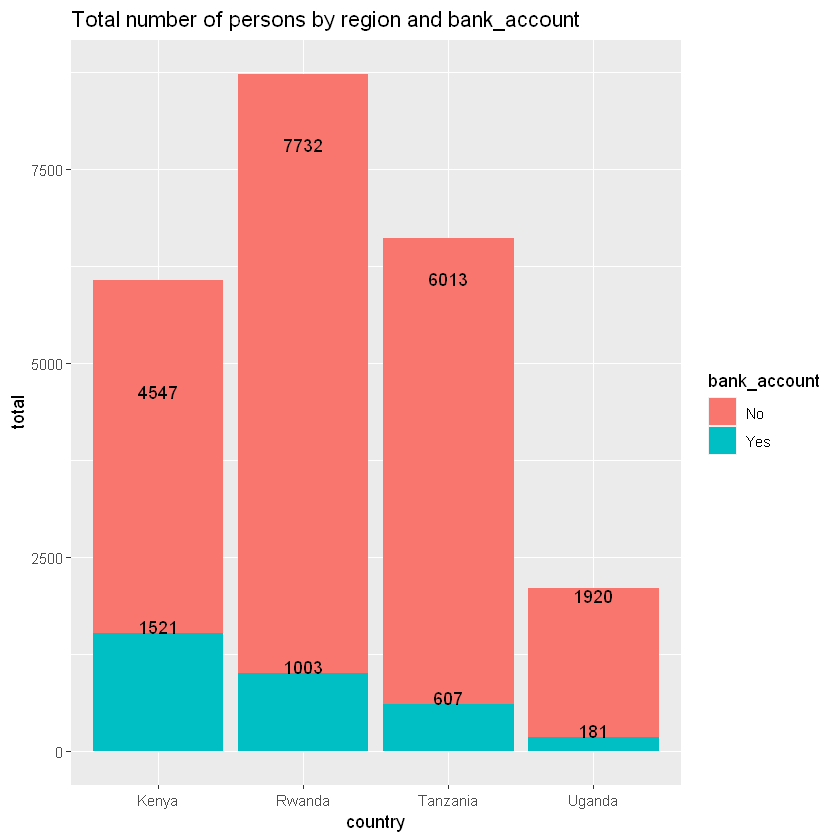

In [8]:
df <-dataset %>%
  group_by(country, bank_account) %>%
  summarise(total=n(), .groups = "drop_last")

df %>%
  ggplot(aes(country,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=0)+
  ggtitle("Total number of persons by region and bank_account")

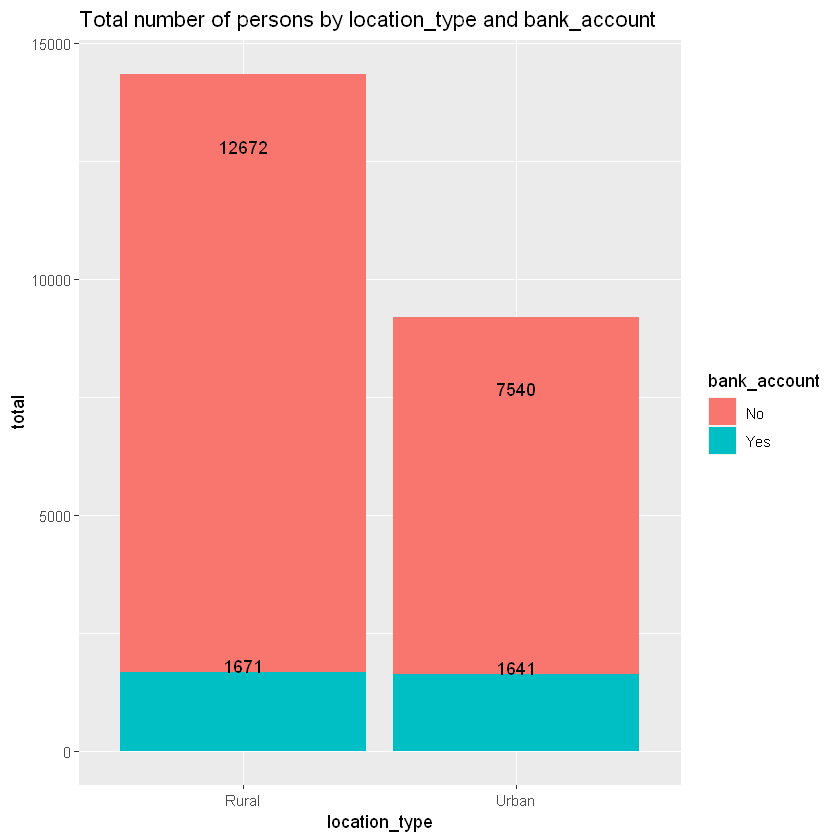

In [9]:
df<-dataset %>%
  group_by(location_type, bank_account) %>%
  summarise(total=n(), .groups = "drop_last") 

df %>%
  ggplot(aes(location_type,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=0)+
  ggtitle("Total number of persons by location_type and bank_account")

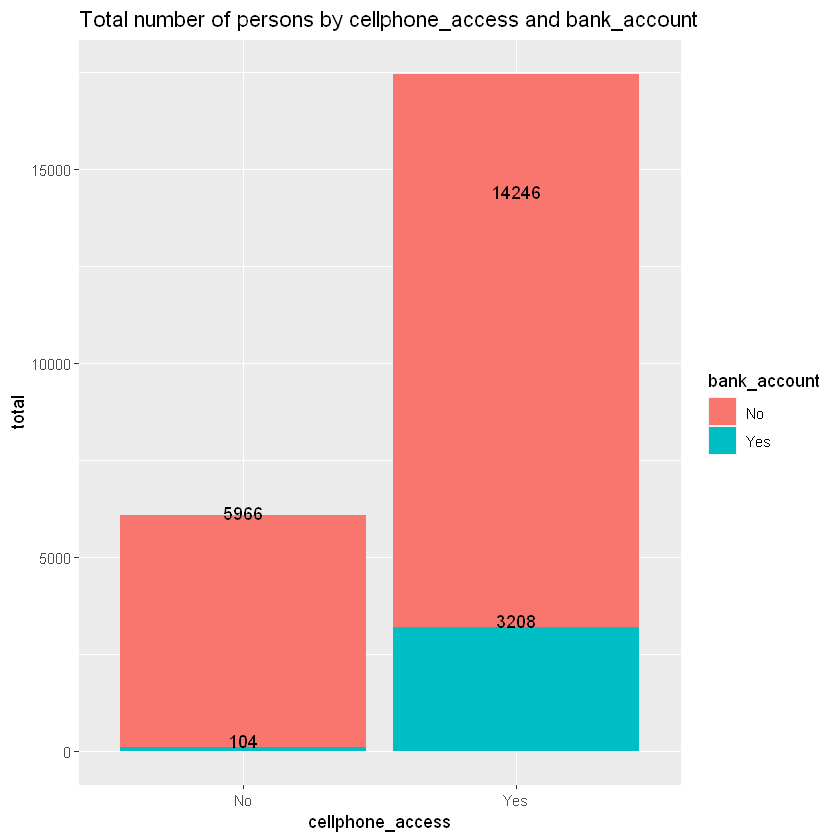

In [10]:
df<-dataset %>%
  group_by(cellphone_access, bank_account) %>%
  summarise(total=n(), .groups = "drop_last") 

df %>%
  ggplot(aes(cellphone_access,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=0)+
  ggtitle("Total number of persons by cellphone_access and bank_account")

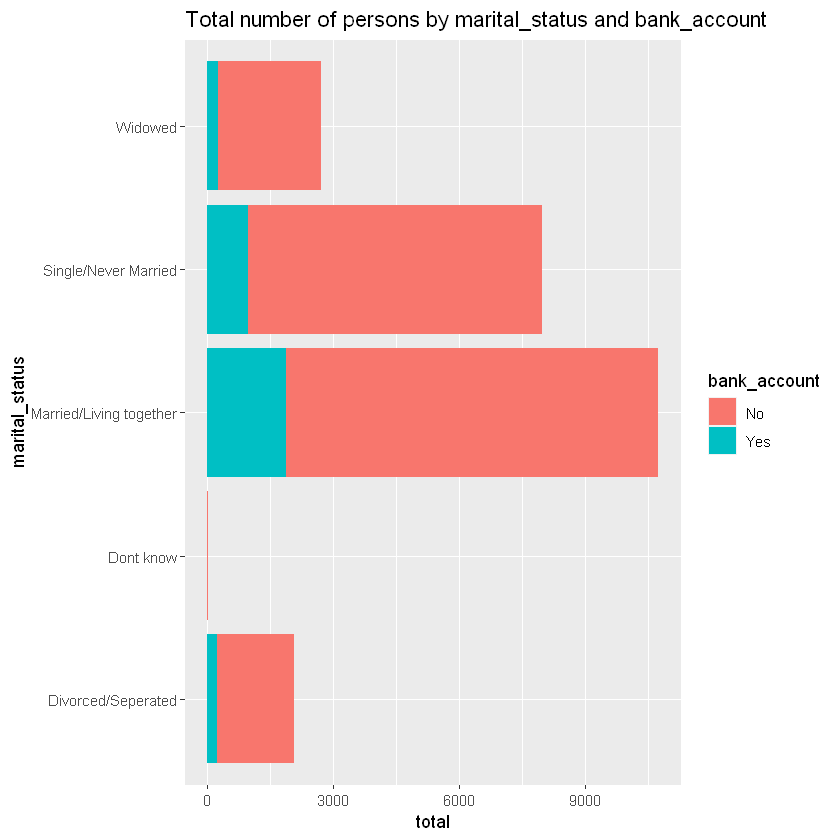

In [11]:
df<-dataset %>%
  group_by(marital_status, bank_account) %>%
  summarise(total=n(), .groups = "drop_last") 

df %>%
  ggplot(aes(marital_status,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  #geom_text(aes(label=total), vjust=0)
  coord_flip()+
  ggtitle("Total number of persons by marital_status and bank_account")

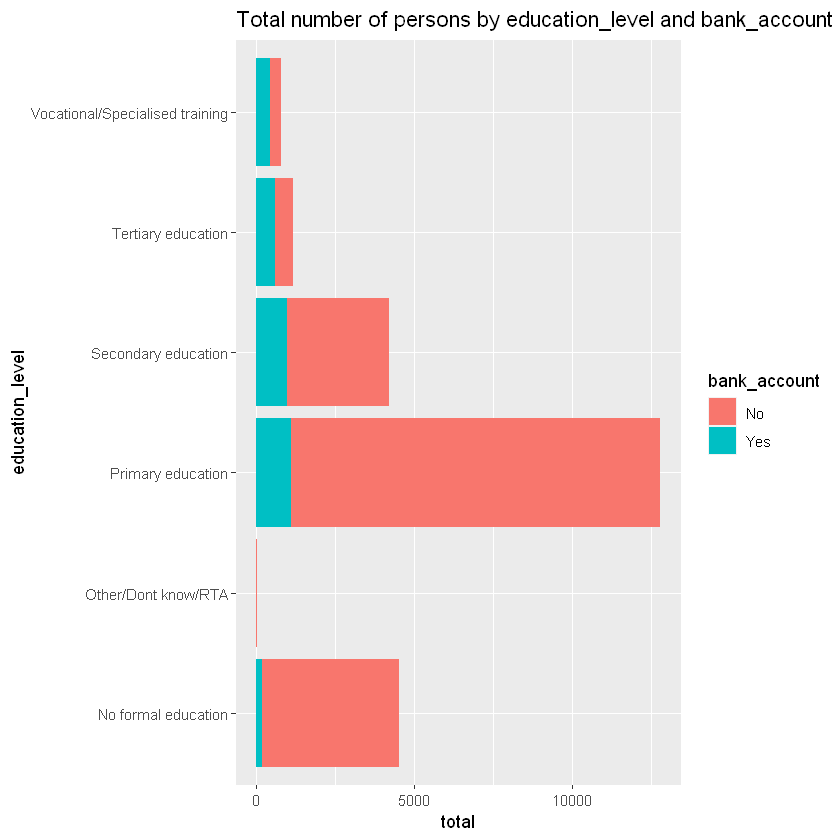

In [12]:
df<-dataset %>%
  group_by(education_level, bank_account) %>%
  summarise(total=n(), .groups = "drop_last") 

df %>%
  ggplot(aes(education_level,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  #geom_text(aes(label=total), vjust=0)+
  coord_flip()+
  ggtitle("Total number of persons by education_level and bank_account")

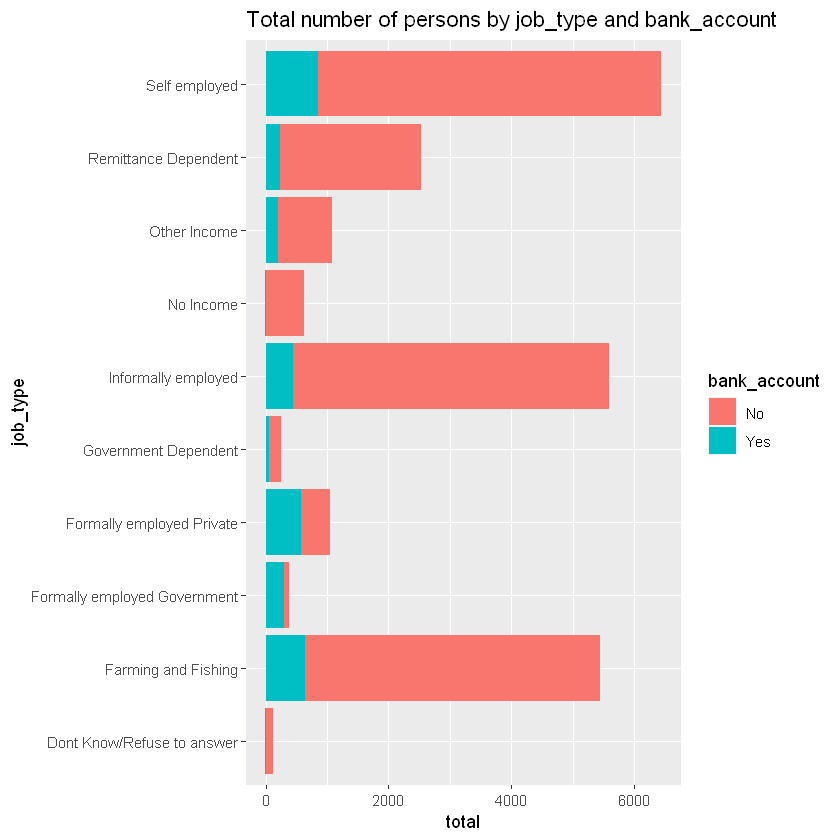

In [13]:
df<-dataset %>%
  group_by(job_type, bank_account) %>%
  summarise(total=n(), .groups = "drop_last") 

df %>%
  ggplot(aes(job_type,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  #geom_text(aes(label=total), vjust=0)+
  coord_flip()+
  ggtitle("Total number of persons by job_type and bank_account")


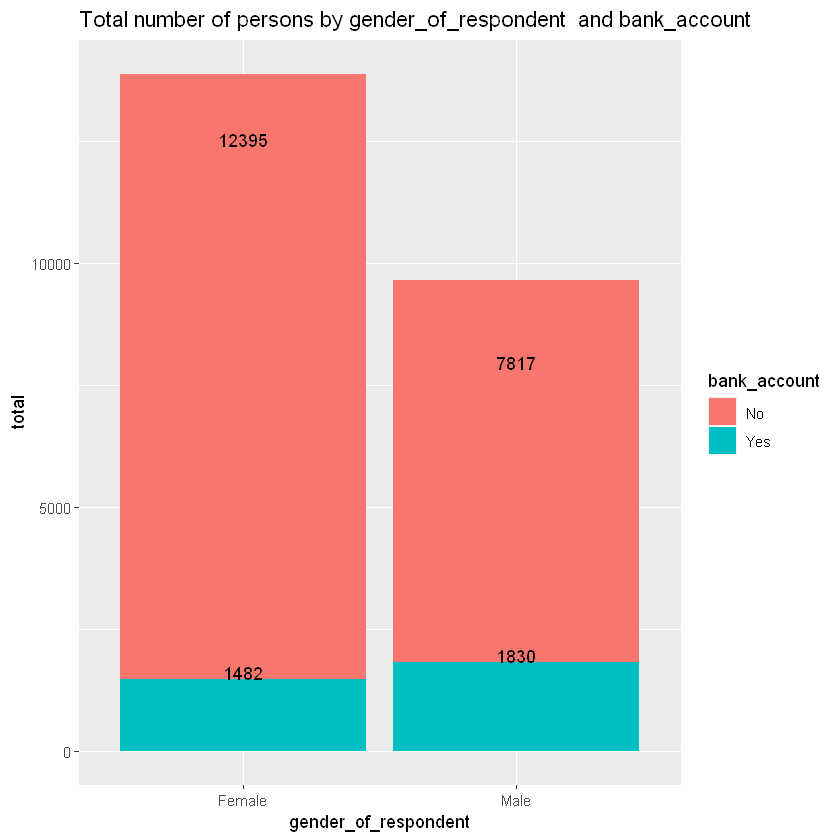

In [14]:
df<-dataset %>%
  group_by(gender_of_respondent, bank_account) %>%
  summarise(total=n(), .groups = "drop_last") 

df %>%
  ggplot(aes(gender_of_respondent,total, fill=bank_account))+
  geom_bar(stat = "identity")+
  geom_text(aes(label=total), vjust=0)+
  ggtitle("Total number of persons by gender_of_respondent  and bank_account")

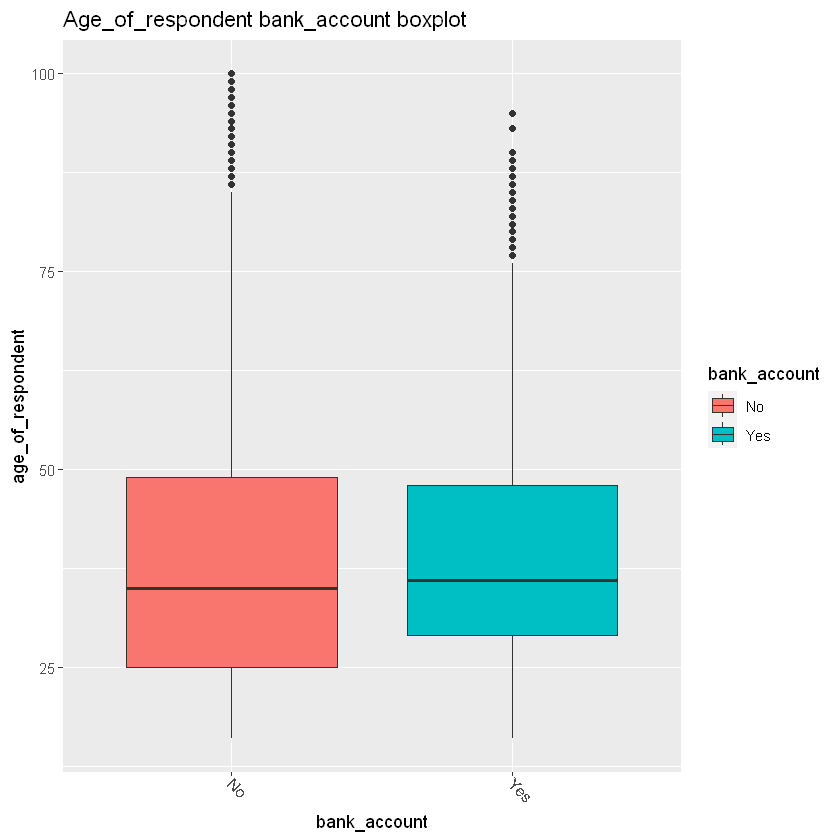

In [15]:
dataset %>%
  ggplot(aes(bank_account,age_of_respondent, fill=bank_account))+
  geom_boxplot()+
  theme(axis.text.x=element_text(angle=-45, vjust=0.5,hjust=0))+
  ggtitle("Age_of_respondent bank_account boxplot")

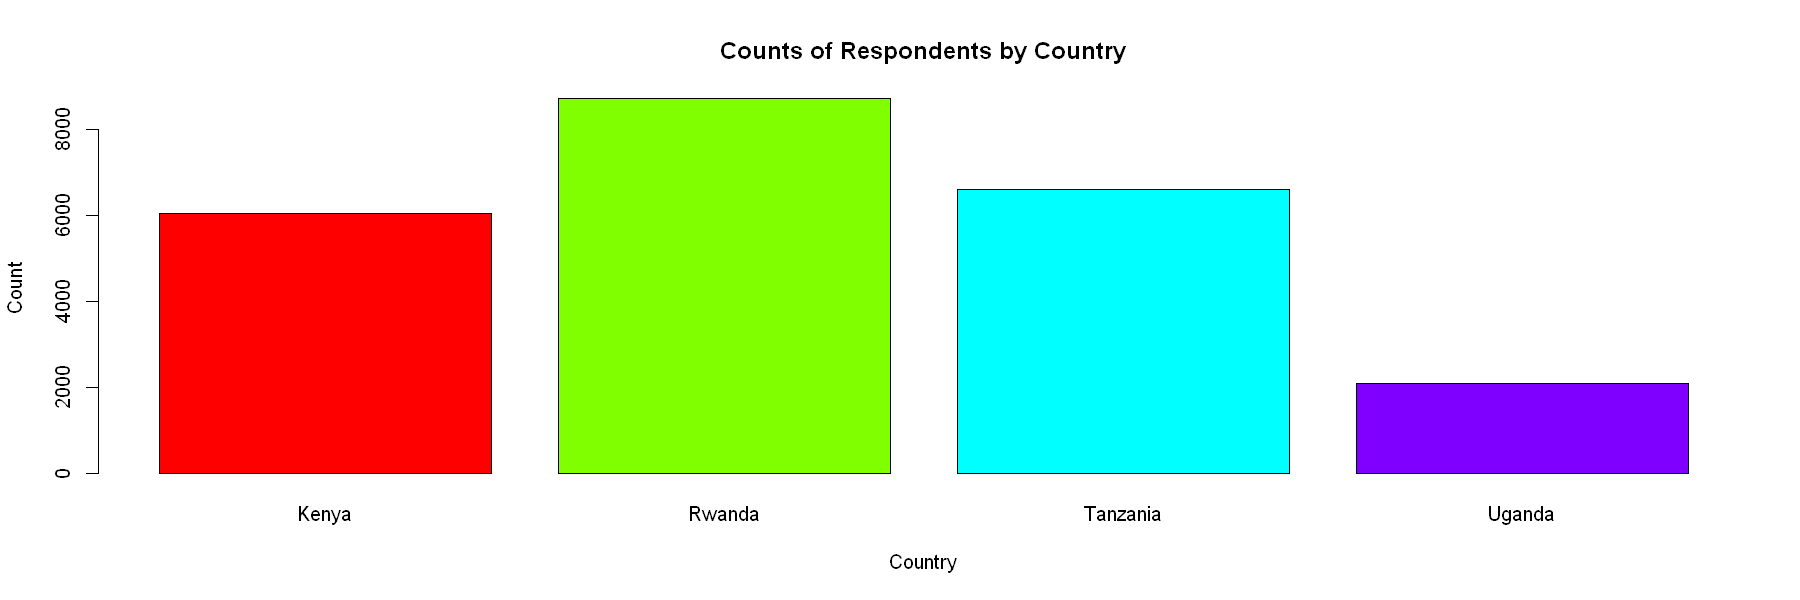

In [22]:

country_counts <- table(dataset$country)
barplot(country_counts, main = "Counts of Respondents by Country", xlab = "Country", ylab = "Count", 
        col = rainbow(length(country_counts)))

# Adjust the plot size
options(repr.plot.width=15, repr.plot.height=5)


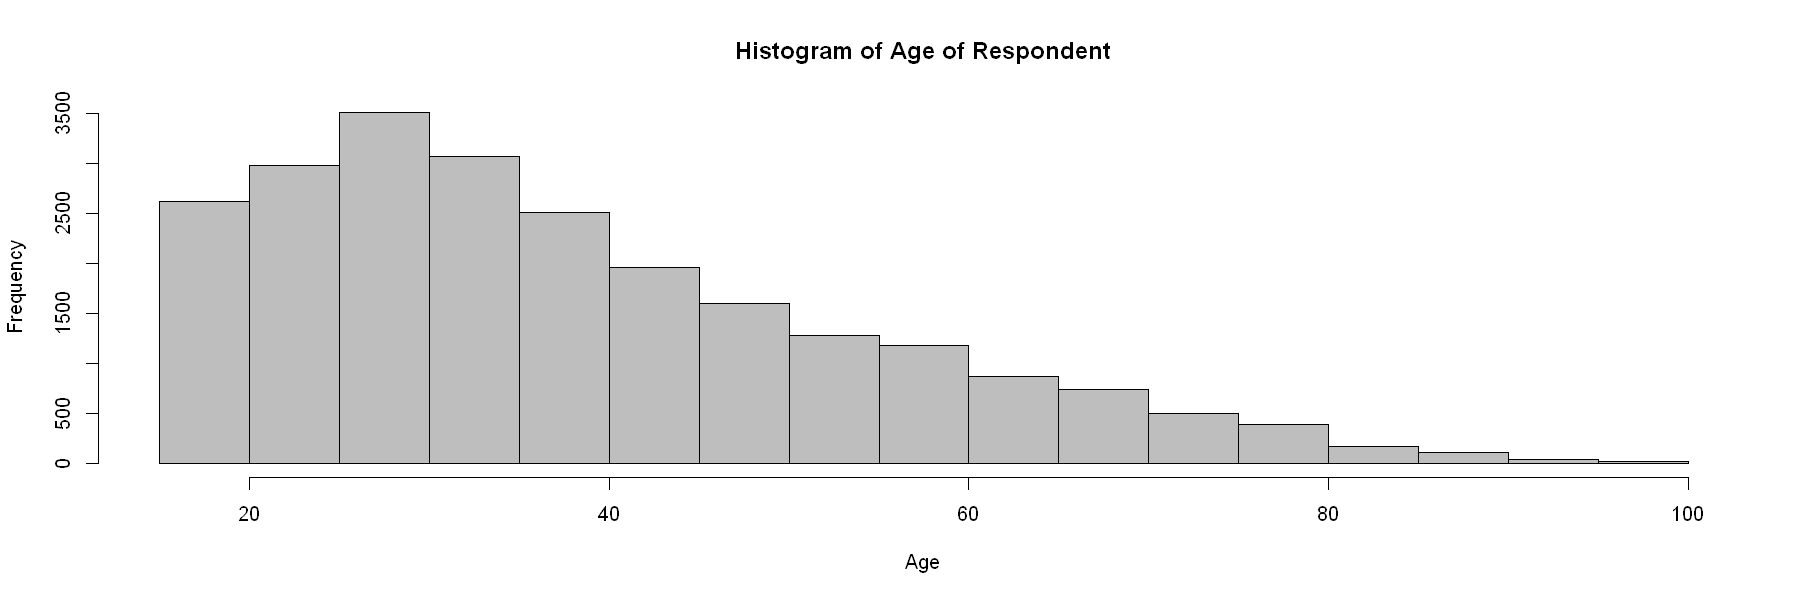

In [23]:

hist_age <- hist(dataset$age_of_respondent, breaks = 25, main = "Histogram of Age of Respondent", 
                 xlab = "Age", ylab = "Frequency", col = "grey")


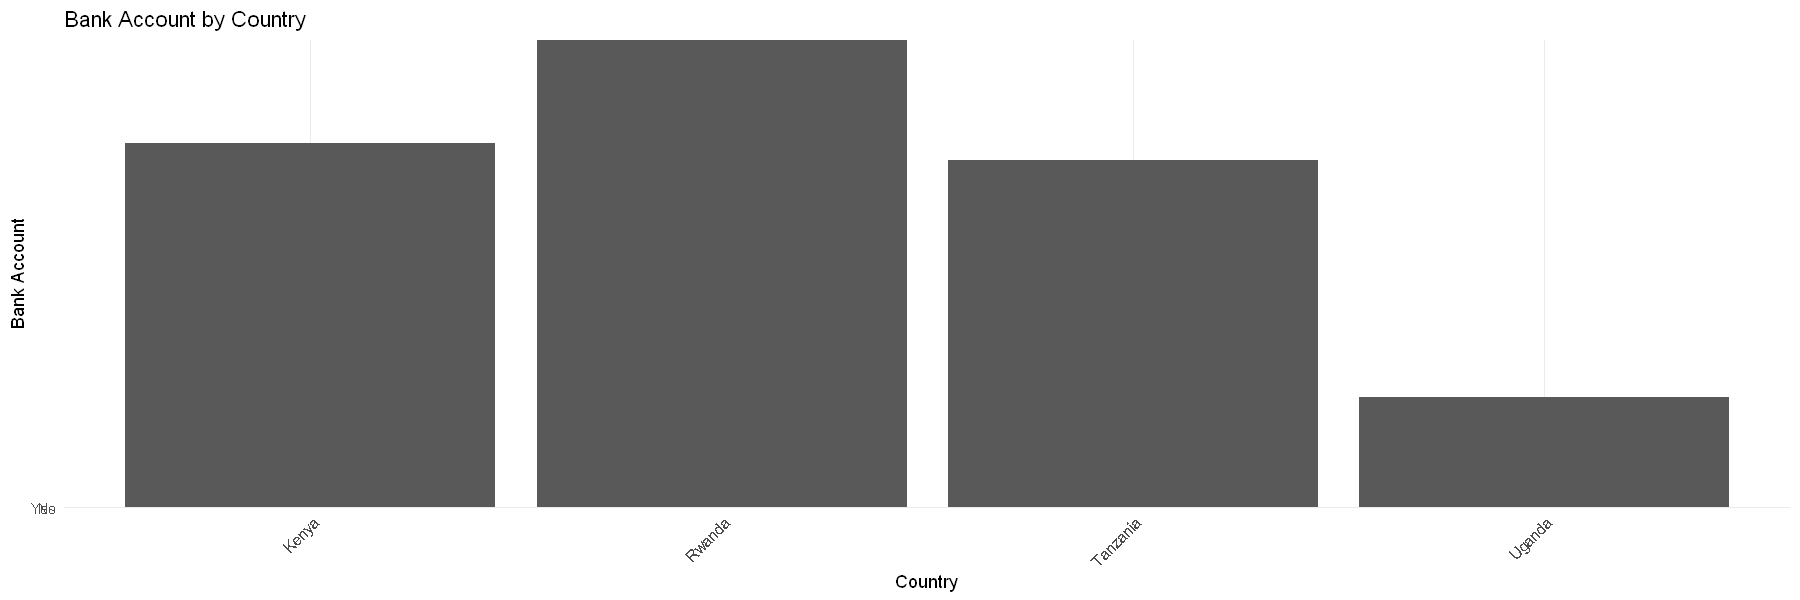

In [26]:
# 
ggplot(dataset, aes(x = country, y = bank_account)) +
  geom_bar(stat = "identity") +
  labs(title = "Bank Account by Country", x = "Country", y = "Bank Account") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
